In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### Q1 a) *k*-means on a Randomly Generated Dataset
42 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [2]:
x1 = [1.9, -4.1, 2.1, -1.8, -2.3, 3.6, 1.9, 4.6, 1.3, 2.5, -1.6, 3.1, -1.2, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [3.0, -2.9, 2.6, -0.9, -3.1, -1.3, 2.7, 1.4, -0.1, 1.9, -1.3, 3.7, -2.0, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
x1 = np.array(x1)
x2 = np.array(x2)

In [209]:
centers = [[-1, 1], [1, -1]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 we will have to implement K-Means Clustering from scratch. Centers are first chosen at random, however here we have initialized the centers for you as `[[-1,-1],[-1,-1]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` we will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

In [95]:
def assign_members(x1, x2, centers):
    #Your code goes here
    
    assign_center = list()
    for i in range(len(x1)):
        distance = list()
        
        points2 = [x1[i], x2[i]]
        
        s = 0
        for j in centers:

            s += (j[0] - points2[0]) **2 
            s += (j[1] - points2[1]) **2
            
            s = s**0.5
            distance.append(s)
            
        assign_center.append(np.argmin(distance))  
    
    pass
    
    return assign_center

#### Define a function that updates the centroid of each cluster

A function that updates the center points, `update_centers` in which we will take along with both features and the 'class of points' as parameter and returns the updated centers.

In [204]:
def update_centers(x1, x2, class_of_points):
    # Your code goes here
    
    class_of_points = assign_members(x1, x2, centers)
    
    cluster1 = list()
    cluster2 = list()
    
    for i in range(len(class_of_points)):
        if class_of_points[i] == 0: 
            cluster1.append([x1[i], x2[i]])
        else:
            cluster2.append([x1[i], x2[i]])
            
    m1=0
    m2 = 0
    for i in cluster1:
        m1 += i[0]
        m2 += i[1]
        
    m1 = m1/len(cluster1)
    m2 = m2/len(cluster1)
    
    center1 = [m1,m2]
    
    m1=0
    m2 = 0
    
    for i in cluster2:
        m1 += i[0]
        m2 += i[1]
    
    m1 = m1/len(cluster2)
    m2 = m2/len(cluster2)
    center2 = [m1,m2]
    
    pass

    return [center1, center2]

In [58]:
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

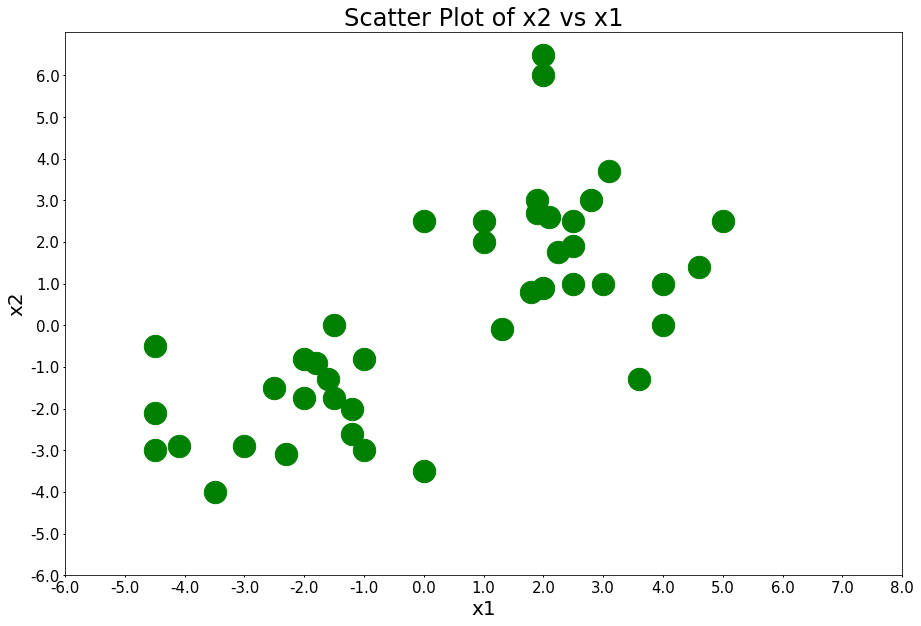

In [210]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

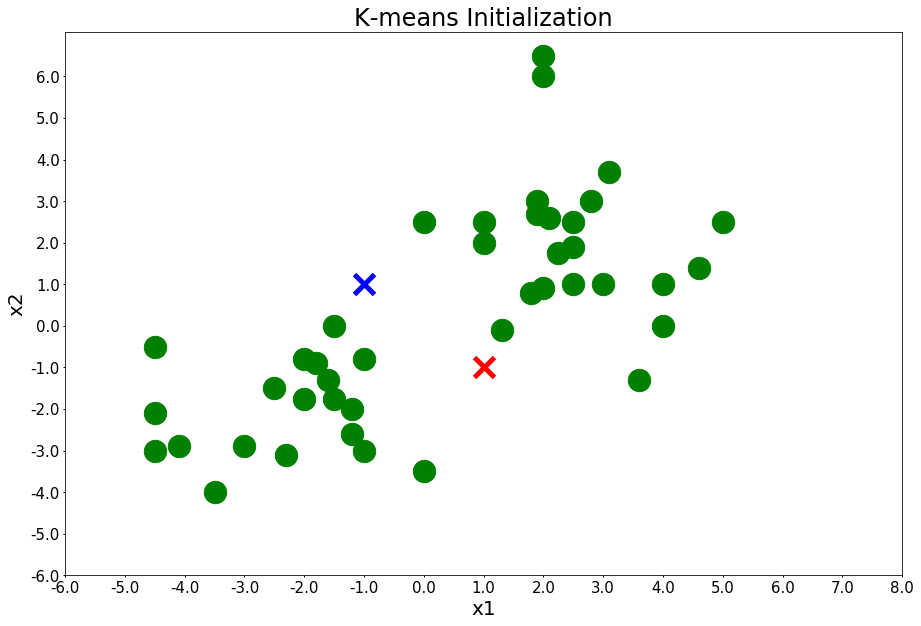

In [211]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that we have implemented and fill out the for loop  
We have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   

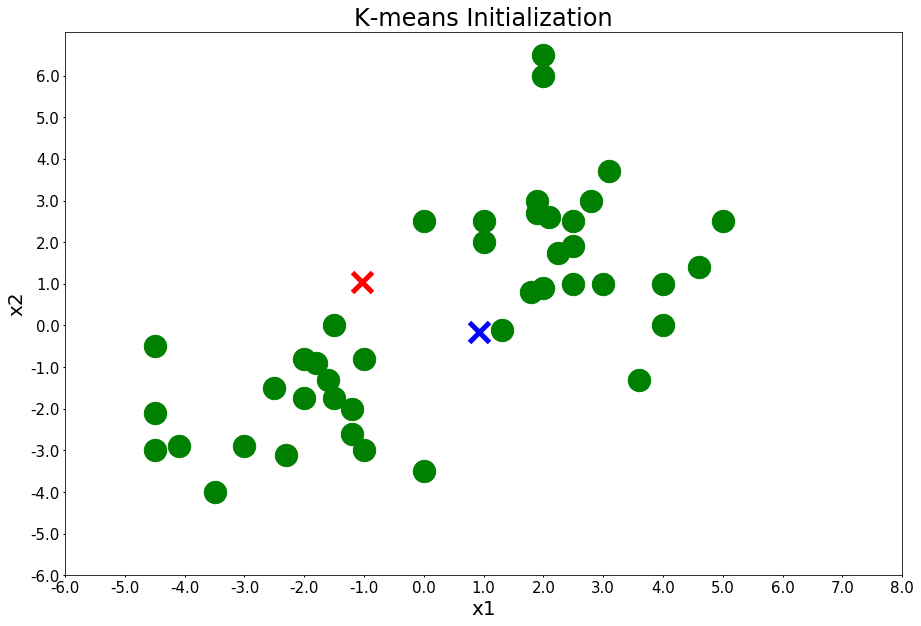

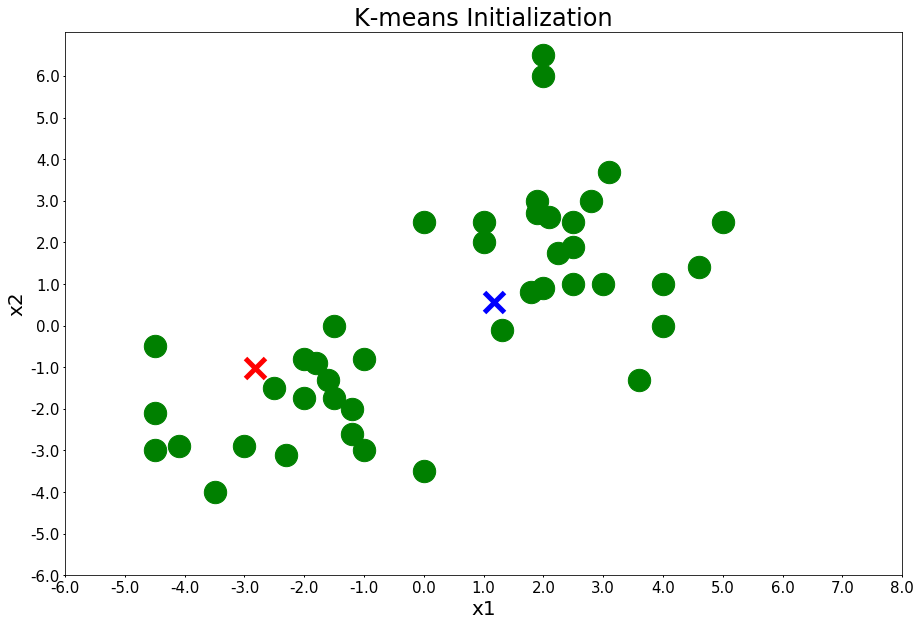

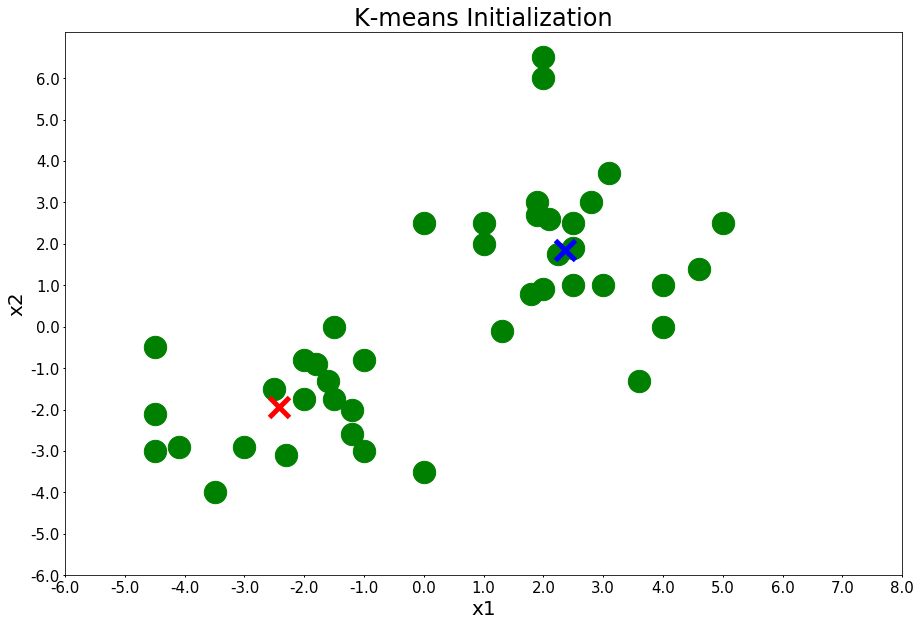

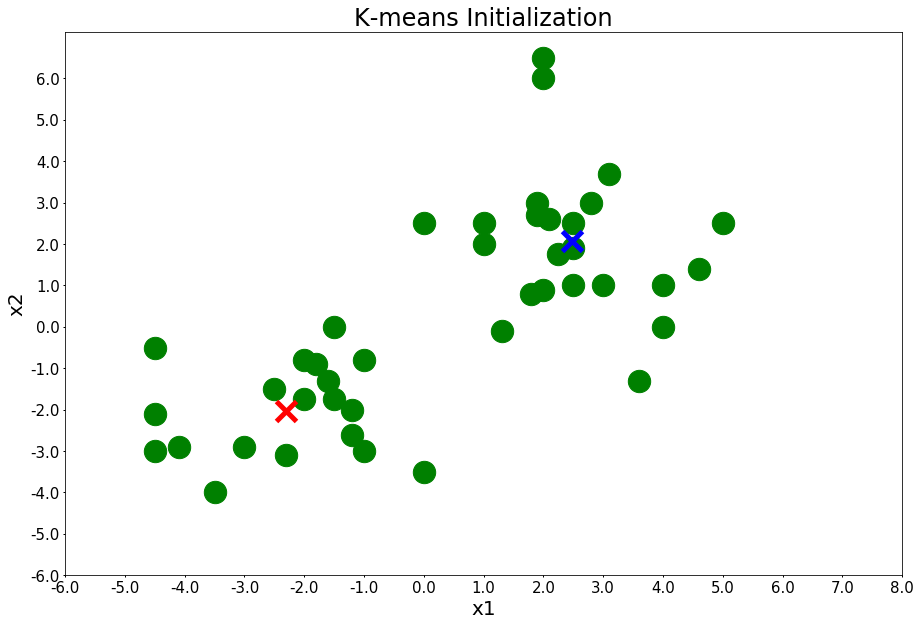

In [212]:
centers = [[1, -1], [-1, 1]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    # Your code goes here
    class_of_points = assign_members(x1, x2, centers)
    centers = update_centers(x1, x2, class_of_points)
    
    plot_points(centers, figure_title='K-means Initialization')
    
    continue

### Q1 b) *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [220]:
# Your code goes here
df = pd.read_csv("D:/customer_segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [221]:
# Your code goes here
df = df.drop(['Customer Id', 'Address'], axis = 1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:** We dropped Customer ID because is is not providing us any unique information about the customer, this ID would have been given to anyoen who would have appeared at the same index. 
Along with this we dropped Address as it a text data. 

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [223]:
# Your code goes here
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [229]:
#Your code goes here
df = df.dropna()
print(df.head())
print(df.isnull().sum())

   Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0   41    2               6      19      0.124       1.073        0.0   
1   47    1              26     100      4.582       8.218        0.0   
2   33    2              10      57      6.111       5.802        1.0   
3   29    2               4      19      0.681       0.516        0.0   
4   47    1              31     253      9.308       8.908        0.0   

   DebtIncomeRatio  
0              6.3  
1             12.8  
2             20.9  
3              6.3  
4              7.2  
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** I have removed the rows with NaN values. As estimating those values might have given us an estimated clusters. Which could have lead to question on the likelyhood of our segmentation. To avoid using data that contains estimated figures 

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [247]:
# Your code goes here
#X = None # Normalized numpy array, used later in the visualization step
X = np.array(df)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 4 clusters here.
Initailize the `n_init` parameter to equal 12

In [292]:
# Your code goes here

# Initialize
kmeans = KMeans(n_clusters=4, n_init=12)
# Fit
kmeans.fit(X)

# Print labels
kmeans.labels_

array([4, 0, 1, 4, 3, 4, 2, 0, 1, 4, 1, 4, 2, 4, 2, 1, 0, 3, 4, 4, 4, 0,
       0, 1, 4, 1, 1, 4, 1, 0, 1, 0, 0, 4, 4, 0, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 1, 4, 1, 2, 2, 0, 4, 4, 4, 4, 3, 0, 3, 0, 0,
       1, 1, 4, 4, 1, 1, 2, 4, 1, 2, 1, 0, 1, 1, 0, 4, 4, 0, 0, 2, 4, 1,
       4, 4, 0, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 2, 0, 1, 1,
       4, 4, 4, 3, 2, 1, 4, 4, 4, 1, 4, 0, 0, 1, 1, 0, 4, 4, 4, 2, 2, 4,
       4, 2, 0, 4, 2, 1, 4, 1, 0, 4, 1, 0, 1, 4, 4, 3, 1, 1, 4, 4, 0, 1,
       0, 4, 0, 3, 2, 0, 1, 4, 1, 4, 0, 0, 2, 4, 4, 4, 1, 1, 0, 1, 0, 4,
       2, 4, 4, 3, 4, 2, 0, 4, 0, 0, 0, 4, 1, 0, 4, 4, 4, 4, 0, 0, 2, 4,
       2, 4, 4, 0, 1, 0, 1, 4, 4, 0, 1, 0, 1, 0, 4, 4, 1, 4, 4, 1, 1, 1,
       4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 1, 4, 4, 1, 4, 2, 0, 0, 0, 4, 4,
       1, 4, 0, 1, 4, 4, 4, 4, 0, 1, 1, 3, 4, 1, 4, 4, 1, 1, 0, 0, 0, 0,
       1, 4, 2, 1, 4, 0, 0, 0, 0, 1, 0, 4, 4, 2, 4, 4, 3, 2, 4, 4, 4, 4,
       3, 2, 4, 0, 1, 4, 2, 0, 4, 0, 0, 0, 0, 1, 4,

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [265]:
# Your code goes here
df["Labels"] = kmeans.labels_

l = np.array(kmeans.labels_)
X = np.hstack((X, np.atleast_2d(l).T))

labels = kmeans.labels_

**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

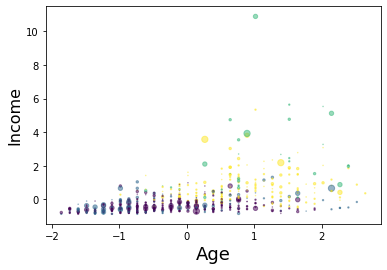

In [269]:
#Do not change this
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into four groups since we specified the algorithm to generate 4 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 4 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [294]:
# Your code goes here
groups = df.groupby('Labels')

for i in range(4) :
    print(groups.get_group(i).mean())

Age                32.201807
Edu                 1.641566
Years Employed      5.948795
Income             30.891566
Card Debt           0.652241
Other Debt          1.538840
Defaulted           0.000000
DebtIncomeRatio     7.514157
Labels              0.000000
dtype: float64
Age                31.696970
Edu                 1.896970
Years Employed      3.921212
Income             31.424242
Card Debt           1.594261
Other Debt          2.823733
Defaulted           0.975758
DebtIncomeRatio    14.071515
Labels              1.000000
dtype: float64
Age                 43.125000
Edu                  2.343750
Years Employed      17.187500
Income             133.062500
Card Debt            7.995750
Other Debt          12.884469
Defaulted            0.593750
DebtIncomeRatio     19.612500
Labels               2.000000
dtype: float64
Age                41.526316
Edu                 1.596491
Years Employed     15.789474
Income             71.473684
Card Debt           2.058684
Other Debt        

Characteristics for each cluster  
1. lowest income among other clusters, lowest card debt, lowest defaulters. 
2. age is lowest, lowest years employed
3. This cluster has the highest age, highest education levels, highest years employed, highest income,highest card debt
4. high age and years employed but relatively low education than cluster 3, second lowest defualters. 

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. K-mean is better in terma of time complecity, as it involves a linear program which is simple. And hierarchal clustering involves complex calculations which makes it slower. 
2. k-Means can produce tigher clusters than hierarchy clusters, which makes then easier to interpret. 

**Disadvantages**
1. K-means starts with a random mean, hence, when you run the algorithm again and again you might get different results in each cluster, hence, it lacks consistency. Such is not the case with hierarchy clustering. 
2. When we have a high vareity in our data then k-mean might not be useful. Whereas hierarchy could be useful as it does not require any specific distance function. 

**Step 10)**
Save your data frame from step, 9 to an Excel or csv file format.

In [295]:
#Your code goes here
df.to_excel("output.xlsx")

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset (in the file customers_shopping.csv) and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [299]:
### Code here
df2 = pd.read_csv("D:/University/8th Semester/Data mining/Assignment 3/Data Mining - Assignment-3/customers_shopping.csv")
print(df2.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Task** Extract Annual Income and Spending score from the dataset

In [300]:
#Your code goes here
df_mini = df2[['Annual Income (k$)', 'Spending Score (1-100)']]

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

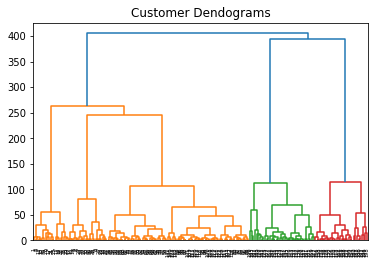

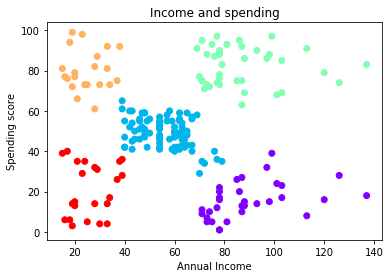

In [329]:
### write your code here

df_array = np.array(df_mini)

dendogram_ = shc.dendrogram(shc.linkage(df_array, method='ward'))
plt.title("Customer Dendograms")
plt.show()

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_array)

plt.scatter(df_array[:,0],df_array[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Income and spending")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

**Question:** What do each of the clusters represent? Discuss.

**Answer:** From this scatter plot we are observing the difference in Annual Income and spending score. So the Yellow cluster represents people with high spending score and less income. In read we can see people with low income and low spending. People in blue cluster are those who have moderate level of income and moderate spending score. Groups in purple and green are interesting. Green represents people with high income and high spending and in purple we have a group which has high earnings but less spending score, perhaps they are careful with their expenses. As a business one should focus on green cluster. As they can bring in highest revenue. 